In [13]:
import cv2
import tensorflow as tf
from os import path
import os
import random
import numpy as np
from matplotlib import pyplot as plt
from model import make_model
from captchaSplitter import getRegionsFromImage, readImage

In [14]:
checkpoint_path="checkpoints\\arch1\\chk1"

In [15]:
model = make_model((50,50,3))

In [16]:
model.load_weights(checkpoint_path)

In [17]:
datasetPath = "lettersDataset_final"

In [18]:
labels = [f.name for f in os.scandir(path.join(datasetPath, "train")) if f.is_dir()]

In [19]:
inputCaptchaPath = "dataset\\nfe\\0aje4.png"
# folder = "lettersDataset_final\\test\\n\\"
# inputCaptchaPath = path.join(folder, random.choice(os.listdir(folder)))

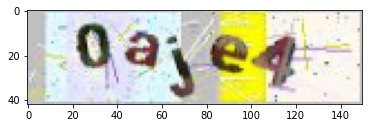

In [20]:
image = readImage(inputCaptchaPath)
plt.imshow(image)

In [21]:
letters = getRegionsFromImage(image)[0]
letters = [cv2.resize(letter, (50,50)) for letter in letters] 
letters = [cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB) for gray in letters] 
letters = np.stack(letters)

In [22]:
predictions = model.predict(letters)

In [23]:
labeledPredictions = [zip(labels, prediction) for prediction in predictions]
predictedLetters = [max(prediction, key=lambda x: x[1]) for prediction in labeledPredictions]

In [24]:
text = "".join([letter for (letter, confidence) in predictedLetters])
confidences = [confidence for (l, confidence) in predictedLetters]

In [25]:
print(text)
print(confidences)

0aje4
[0.998965, 0.99108255, 0.9984439, 0.99051875, 0.8545238]
